In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('Employee_Salary_Dataset.csv')

In [84]:
data.dtypes

ID                   int64
Experience_Years     int64
Experience_Level    object
Age                  int64
Age Group           object
Gender              object
Salary               int64
dtype: object

In [85]:
data.head()

,ID,Experience_Years,Experience_Level,Age,Age Group,Gender,Salary
0,1,5,0-5,28,19-29,Female,250000
1,2,1,0-5,21,19-29,Male,50000
2,3,3,0-5,23,19-29,Female,170000
3,4,2,0-5,22,19-29,Male,25000
4,5,1,15+,17,under 18,Male,10000


In [86]:
data.tail()

,ID,Experience_Years,Experience_Level,Age,Age Group,Gender,Salary
30,31,10,15+,34,30-39,Male,80000
31,32,15,15+,54,50-59,Male,900000
32,33,20,15+,55,50-59,Female,1540000
33,34,19,15+,53,50-59,Female,9300000
34,35,16,0-5,49,40-49,Male,7600000


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Experience_Level  35 non-null     object
 3   Age               35 non-null     int64 
 4   Age Group         35 non-null     object
 5   Gender            35 non-null     object
 6   Salary            35 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.0+ KB


### Check Null Values In The Dataset

In [88]:
data.isnull().values.any()

False

In [89]:
data.isnull().sum()

ID                  0
Experience_Years    0
Experience_Level    0
Age                 0
Age Group           0
Gender              0
Salary              0
dtype: int64

<Axes: >

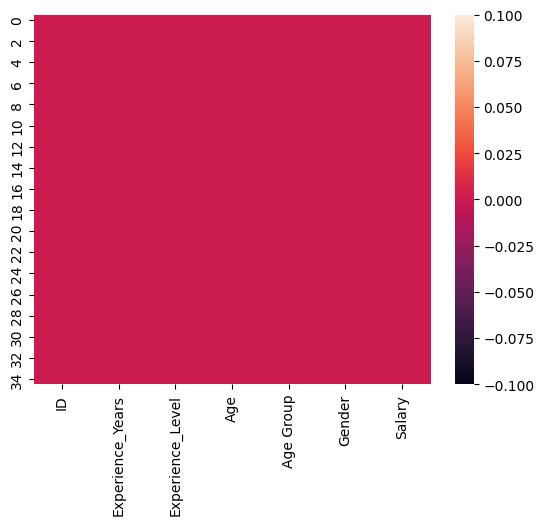

In [90]:
sns.heatmap(data.isnull())

### Check For Duplicate Data and Drop Them

In [91]:
dup = data.duplicated().any()
print(dup)

False


### What is the distribution of employees based on gender?

In [92]:
data.columns

Index(['ID', 'Experience_Years', 'Experience_Level', 'Age', 'Age Group',
       'Gender', 'Salary'],
      dtype='object')

In [93]:
gender_distribution = data['Gender'].value_counts()
print(gender_distribution)

Gender
Female    18
Male      17
Name: count, dtype: int64


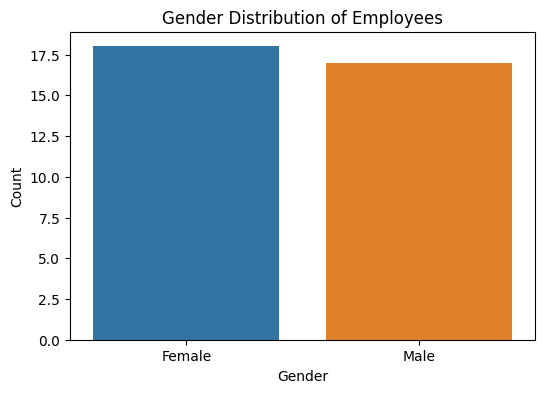

In [94]:
#Visualization using a bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=data)
plt.title('Gender Distribution of Employees')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### What is the average salary of male and female employees?

In [95]:
average_salary_by_gender = data.groupby('Gender')['Salary'].mean(numeric_only=True)
print(average_salary_by_gender)

Gender
Female    2.054917e+06
Male      2.063626e+06
Name: Salary, dtype: float64


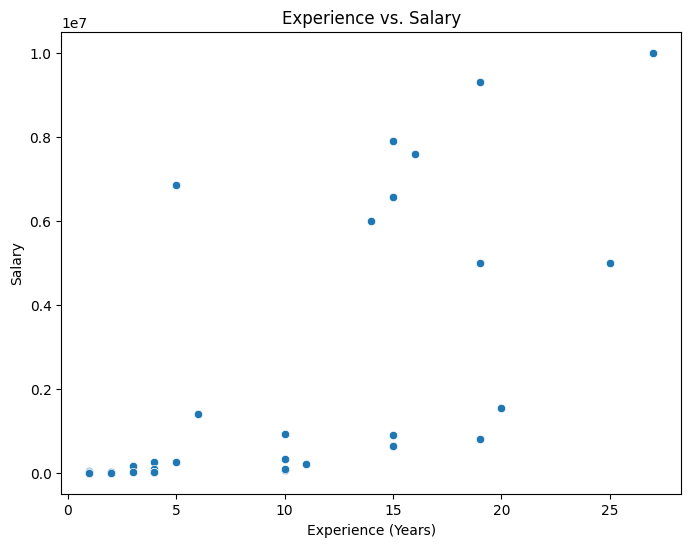

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Experience_Years', y='Salary', data=data)
plt.title('Experience vs. Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

### What is the age distribution of employees?

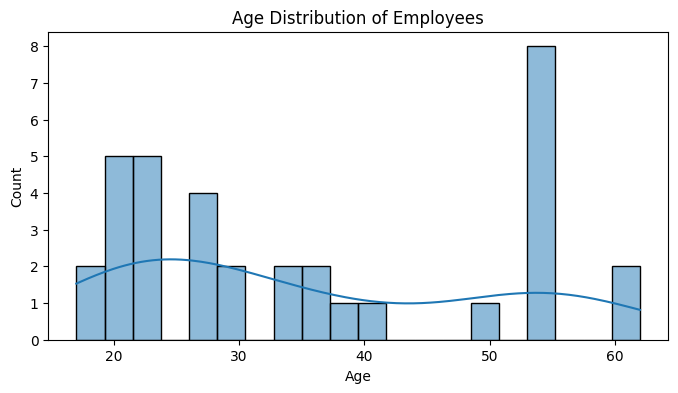

In [97]:
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], bins=20,kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Are there any outliers in the salary column? If yes, how many are there, and what is the range of salaries?

In [98]:
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
Interquartile_Range = Q3 - Q1
lower_bound = Q1 - 1.5 * Interquartile_Range
upper_bound = Q3 + 1.5 * Interquartile_Range

outliers = data[(data['Salary']<lower_bound) | (data['Salary']<upper_bound)]
print("Number of outliers:",len(outliers))
print("Range of salaries:", data['Salary'].min(), "-", data['Salary'].max())


Number of outliers: 33
Range of salaries: 3000 - 10000000


### How does the age of employees affect their salaries? plot a line plot to visualize this relationship?

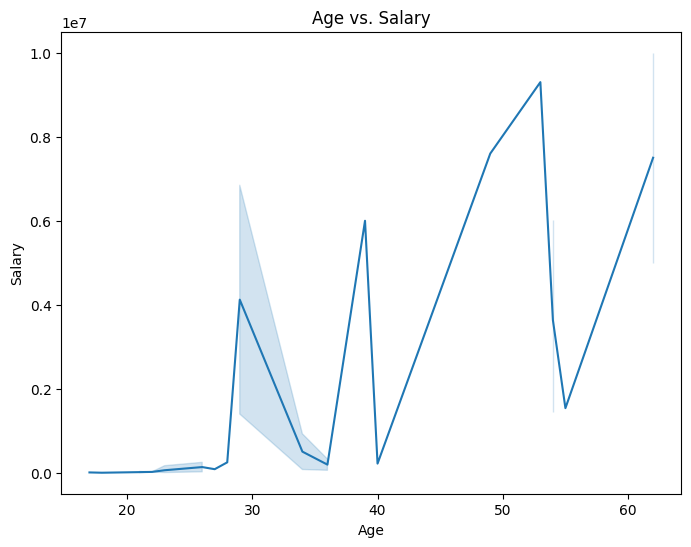

In [99]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Salary', data=data)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### What is the correlation between experience years and age of employees?

In [100]:
correlation = data['Experience_Years'].corr(data['Age'])
print("Correlation between Experience Years and Age:", correlation)

Correlation between Experience Years and Age: 0.9737084102672062


### plot a histogram to show the distribution of salaries among employees.

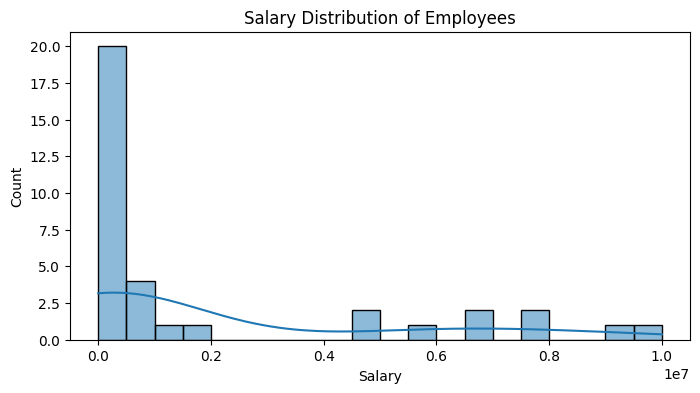

In [101]:
plt.figure(figsize=(8,4))
sns.histplot(data['Salary'],bins=20,kde=True)
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

### What is the average salary of employees with different levels of experience?

In [102]:
data.columns

Index(['ID', 'Experience_Years', 'Experience_Level', 'Age', 'Age Group',
       'Gender', 'Salary'],
      dtype='object')

In [115]:
pd.options.display.float_format = "{:.2f}".format

In [116]:
bins = [0, 5, 10, 15, float('inf')]
labels = ['0-5', '5-10', '10-15', '15+']

data['Experience_Level'] = pd.cut(data['Experience_Years'], bins=bins, labels=labels)

average_salary_by_experience = data.groupby('Experience_Level')['Salary'].mean()
print(average_salary_by_experience)

Experience_Level
0-5      458088.24
5-10     560300.00
10-15   3706691.67
15+     5605857.14
Name: Salary, dtype: float64


### create a box plot to visualize the distribution of salaries based on gender

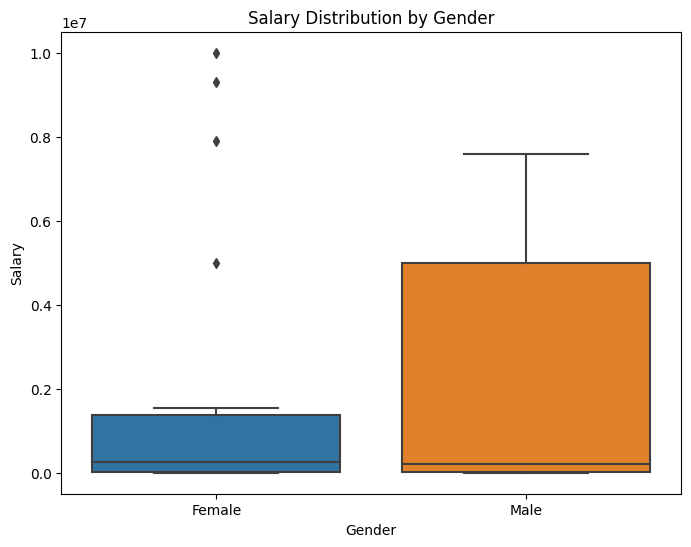

In [117]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

### How does the salary change with increasing years of experience? create a line plot to show this trend?

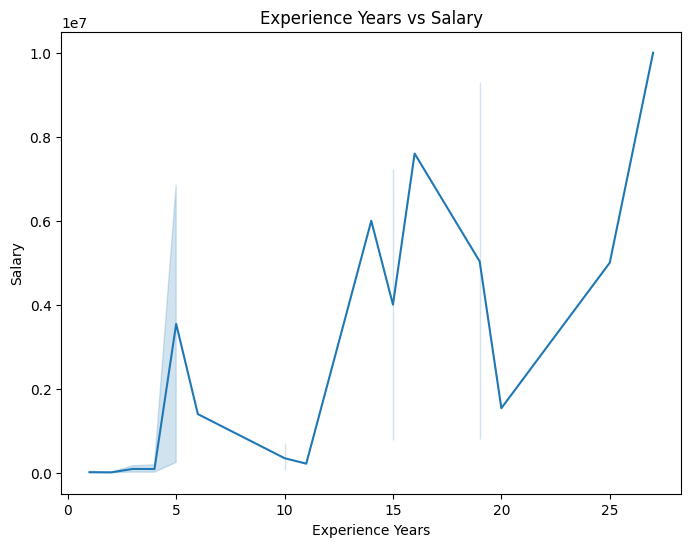

In [118]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Experience_Years', y='Salary', data=data)
plt.title('Experience Years vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

### Is there any difference in the salary of male and female employees with the same years of experience?

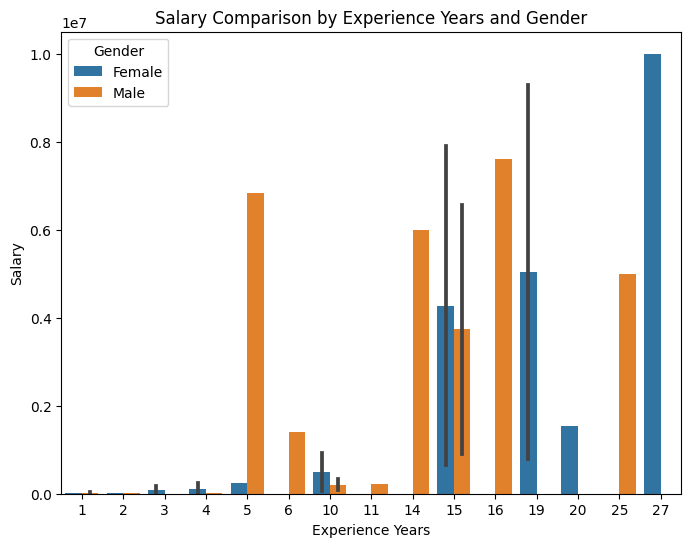

In [119]:
plt.figure(figsize=(8,6))
sns.barplot(x='Experience_Years', y='Salary', hue='Gender', data=data)
plt.title('Salary Comparison by Experience Years and Gender')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

### calculate the overall average salary of all employees

In [121]:
overall_average_salary = data['Salary'].mean()
print("Overall Average Salary:", overall_average_salary)

Overall Average Salary: 2059147.142857143


### How many employees fall within different age groups (e.g., 20-30, 30-40, etc.)? Can you visualize this using a bar plot?

In [122]:
bins = [0, 19, 30,40, 50, 60, float('inf')]
labels = ['Under 18', '19-29', '30-39', '40-49', '50-59','Above 60']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_group_counts = data['Age_Group'].value_counts()
print(age_group_counts)

Age_Group
19-29       16
50-59        8
30-39        6
Under 18     2
Above 60     2
40-49        1
Name: count, dtype: int64


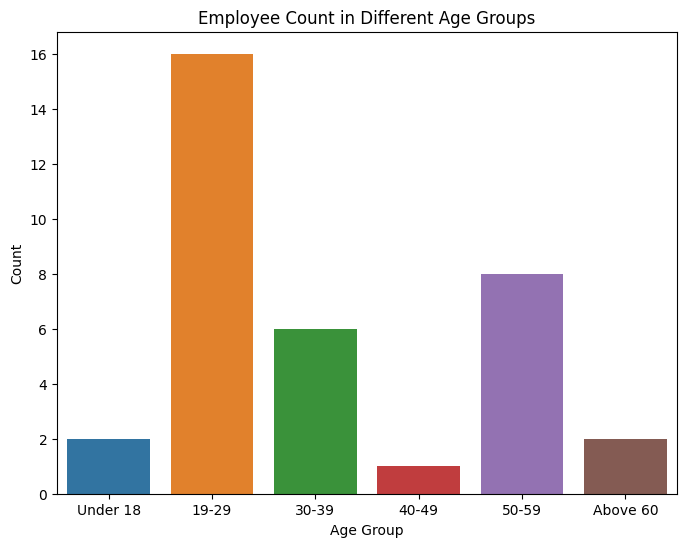

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=data, order=labels)
plt.title('Employee Count in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()